In [26]:
h = [2, 0, 6, 1, 5, 7, 8, 3, 4, 9]
v = [3, 0, 8, 1, 7, 9, 2, 5, 4, 6]

N = len(h)
p = [0.5] * N
n_l = len([i for i in h if h[i] == i])
n_d = N - n_l
r = n_d / n_l * 0.5
soloed = []
soloed_before = []

In [27]:
def solo(a):
    h_inv_a = h.index(a)
    ha = h[a]
    h[h_inv_a] = ha
    h[a] = a
    soloed.append(a)
    soloed_before.append(h_inv_a)

def unsolo():
    a = soloed.pop()
    h_inv_a = soloed_before.pop()
    ha = h[h_inv_a]
    h[a] = ha
    h[h_inv_a] = a

def track(a, hist):
    solo(a)
    search.append(a)
    history.append(hist + 1)
    history.append(0)
    
def backtrack():
    unsolo()
    search.pop()
    p_acc.pop()

def is_endpoint(a):
    return h[a] == a

def reset_values(a):
    global soloed, soloed_before, search, history, result, p_acc
    soloed.append(a)
    soloed_before.append(a)
    search = [a]
    history = [0]
    p_acc = [1]
    
def fold(a):
    assert is_endpoint(a)
    reset_values(a)
    result = 0
    while search:
        cur = search[-1]
        va = v[cur]
        hist = history.pop()
        if is_endpoint(va):
            backtrack()
            continue
        pp = p[va]
        match hist:
            case 0:
                result += p_acc[-1]
                track(va, hist)
                p_acc.append(p_acc[-1] * pp)
            case 1:
                track(h[va], hist)
                p_acc.append(p_acc[-1] * (1 - pp))
            case 2:
                backtrack()
    return result

def invert():
    global h, v
    h = [h.index(i) for i in range(N)]
    v = [v.index(i) for i in range(N)]
    
def unpredictability(a):
    assert not is_endpoint(a)
    solo(a)
    B = fold(a)
    invert()
    A = fold(a)
    invert()
    unsolo()
    
    ha = h[a]
    solo(ha)
    D = fold(ha)
    invert()
    C = fold(ha)
    invert()
    unsolo()
    
    Delta = abs(A + D - B - C)
    return 1 - (r / (r + Delta))

def update():
    global p
    q = p[:]
    for i in range(N):
        if not is_endpoint(i):
            q[i] = unpredictability(i)
    p = q

def dynamism():
    result = 0
    for i in range(N):
        if not is_endpoint(i):
            result += unpredictability(i)
    return result / n_d

In [28]:
dynas = []
for i in range(5000):
    update()
    dynas.append(dynamism())

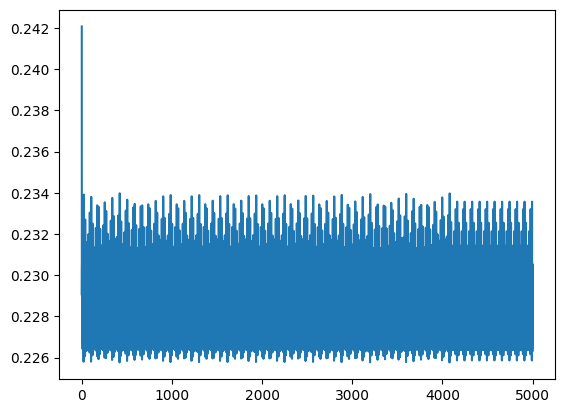

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(1, 5001), dynas)